# Implement of the Epsilon-greedy method

In [1]:
# import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# global constant
EPS = 0.1
NUM_TRIAL = 10000
BANDIT_PROBABILITIES = [0.2,0.5,0.75]

In [3]:
# Bandit class
class Bandit():
    
    def __init__(self, p):
        # initial state of the bandit before next pull
        # p : the win rate
        self.p = p
        self.p_estimate = 0 
        self.N = 0
        
    def __str__(self):
        return f"the mean of the bandit {self.p} is {self.p_estimate}"
        
    def pull(self):
        # draw a 1 with the probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N = self.N + 1
        #self.p_estimate = (1-1/self.N)*self.p_estimate + x/self.N
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
        
def experiment():
    
    # initialize the 3 Bandits
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIAL)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    # the loop
    for i in range(NUM_TRIAL):
        
        # use epsilon-greedy to select the next bandit
        current_draw = np.random.random()
        if current_draw < EPS:
            num_times_explored += 1
            j = np.random.randint(0,3)
        else:
            num_times_exploited += 1
            j = optimal_j
        
        if j == optimal_j:
            num_optimal += 1
        
        # trigger the current bandit
        cur_bandit = bandits[j]
        rewards[i] = cur_bandit.pull()
        cur_bandit.update(rewards[i])
        
    for b in bandits:    
        print(b)
        
    print("total reward wins : " + str(rewards.sum()))
    print("rate of the benefice : " + str(rewards.sum()/NUM_TRIAL))
    print("number of exploration : " + str(num_times_explored))
    print("number of exploitation : " + str(num_times_exploited))
    print("num times selected optimal bandit:", str(num_optimal))

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIAL) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIAL)*np.max(BANDIT_PROBABILITIES))
    plt.show()
        
            

optimal j: 2
the mean of the bandit 0.2 is 0.19393939393939394
the mean of the bandit 0.5 is 0.48224852071005936
the mean of the bandit 0.75 is 0.75439348478354
total reward wins : 7267.0
rate of the benefice : 0.7267
number of exploration : 1014
number of exploitation : 8986
num times selected optimal bandit: 9332


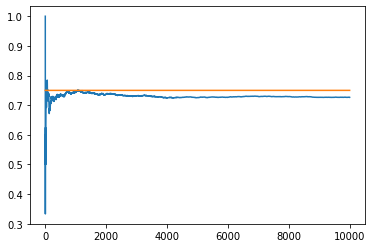

In [4]:
experiment()